In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual
from putils import *

In [2]:
import importlib as imp
import putils
imp.reload(putils)
from putils import *

# Flujo en el circulo. SNLC. Nodo silla sobre el circulo

Veamos primero la ecuacion de Adler en la variable angular $\theta$.

$\dot{\theta} = \omega-a\sin(\theta)$

que presenta una bifurcacion nodo-silla cuando $\omega=a$

Si $a=0$ esta ecuacion representa un fasor con una frecuencia angular fija $\omega$

In [3]:
#definimos la ecuacion
def snlc(t, x, ω, a):
    return[
        ω-a*np.sin(x)
    ]

In [4]:
# definimos una funcion para resolver la ecuacion diferencial
def solve_snlc(ω,a,xini,tmax,var):
    dt = tmax/300
    par={'ω':ω,'a':a}
    return solve_plot(snlc,par,[xini],tmax,dt,var=var)

Podemos indicarle a la funcion solve_plot que nuestra variable es una variable angular indicando var='angle'. Veamos el caso del fasor avanzando con una velocidad angular constante

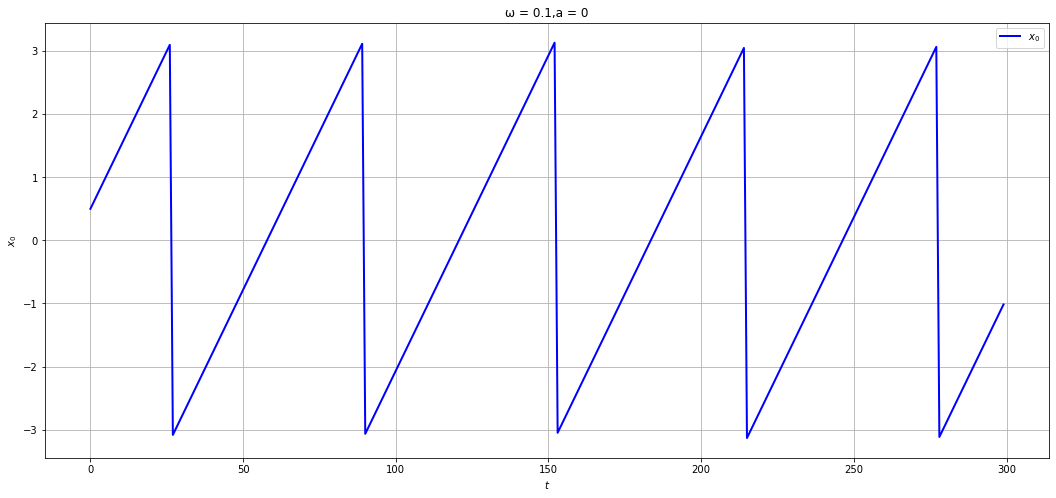

In [5]:
solve_snlc(0.1,0,0.5,300,var='angle')

Para evitar el salto de $\pi$ a $-\pi$ podemos usar el coseno del angulo indicando var='cos'

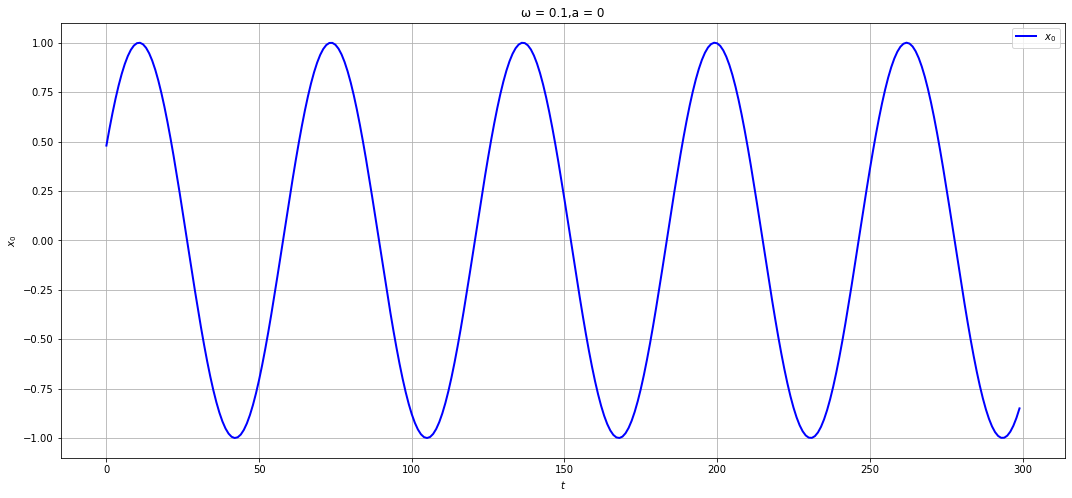

In [42]:
solve_snlc(0.1,0,0.5,300,var='sin')

Veamos que pasa si se incrementa $a$ hasta un valor cercano a $\omega$

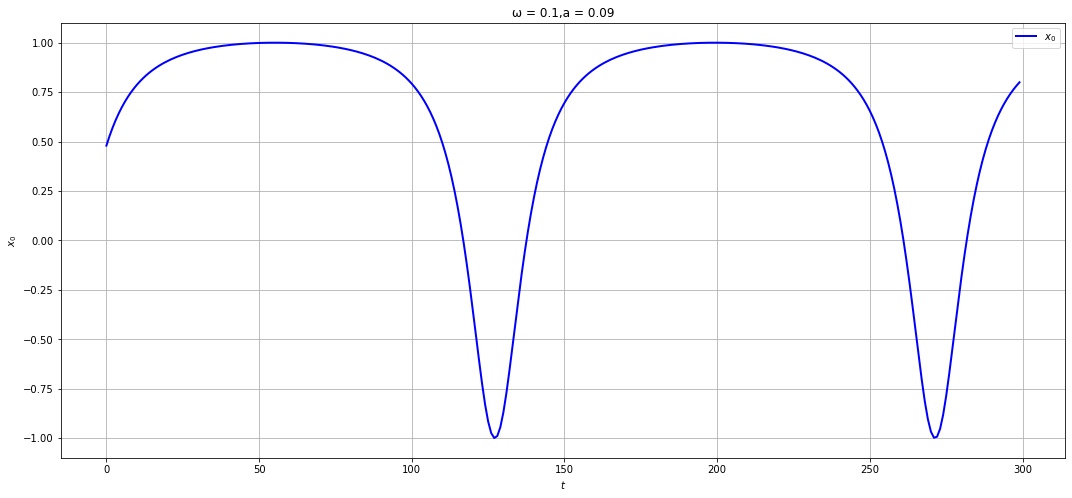

In [43]:
solve_snlc(0.1,0.09,0.5,300,var='sin')

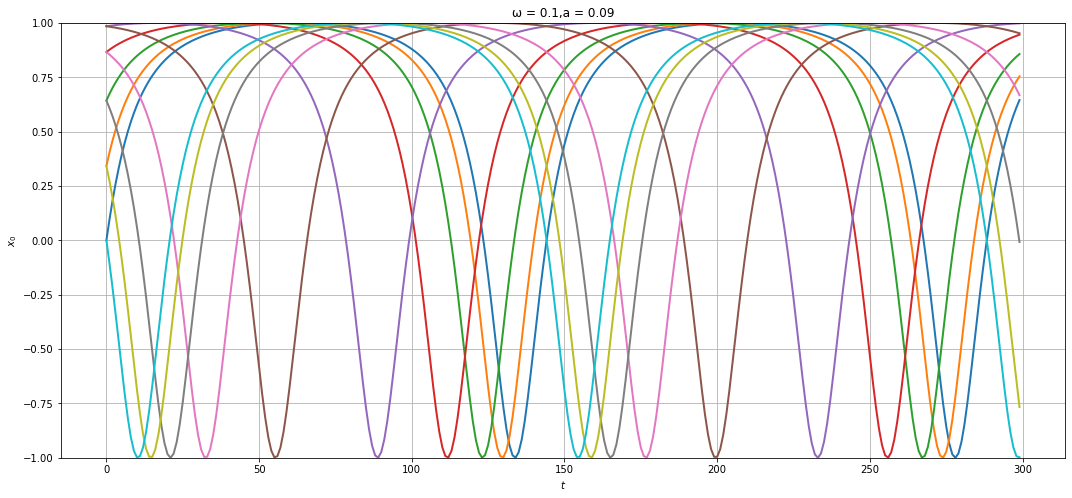

In [44]:
# multiples trayectorias
xini_array = np.linspace(0,np.pi,10)
tmax = 300
dt = tmax/300
pars={'ω':0.1,'a':0.09}
solve_plot1D_multiple(snlc,pars,xini_array,tmax,dt,xrange=[-1,1],var='sin')

In [45]:
iplot0 = interactive(solve_snlc,
                    ω=(0,0.1,0.0001),
                    a=(0,0.1,0.0001), 
                    xini=(0,2*np.pi,0.001),
                    tmax=(1,800,1),
                    var='angle')
                    
iplot0

interactive(children=(FloatSlider(value=0.05, description='ω', max=0.1, step=0.0001), FloatSlider(value=0.05, …

## Evolucion temporal y f(x)
solve_plot1D_dual grafica ademas de la evolucion temporal la funcion f(x) para poder visualizar los puntos fijos y el flujo

In [46]:
def solve_dual_snlc(ω,a,xini,tmax,var):
    dt = tmax/500
    par={'ω':ω,'a':a}
    return solve_plot1D_dual(snlc,par,[xini],tmax,dt,xrange=[-np.pi,np.pi],var=var)

iplot1 = interactive(solve_dual_snlc,
                    ω=(0,0.1,0.0001),
                    a=(0,0.1,0.0001), 
                    xini=(-np.pi,np.pi,0.001),
                    tmax=(1,800,1),
                    var='angle')

iplot1

interactive(children=(FloatSlider(value=0.05, description='ω', max=0.1, step=0.0001), FloatSlider(value=0.05, …

## Periodo del oscilador en funcion del parametro a

progando en la celda interactiva anterior se puede ver que:

1. para $a>\omega$ hay dos puntos fijos en el ciclo uno estable antes de $\pi/2$ y otro inestable luego de $\pi/2$
2. para $a=\omega$ los dos puntos fijos colapsan en $\theta=\pi/2$ (bifurcacion de nodo silla)
3. para $a<\omega$ no hay puntos fijos y el angulo fase avanza continuamente, pero no de forma uniforme, se frena cuando pasa cerca de $\theta=\pi/2$ (o seno = 1), tanto mas cuanto mas cerca esta $a$ de $\omega$

Podemos estudiar como es el periodo de la oscilacion a medida que $a$ se aproxima a $\omega$ ppor debajo

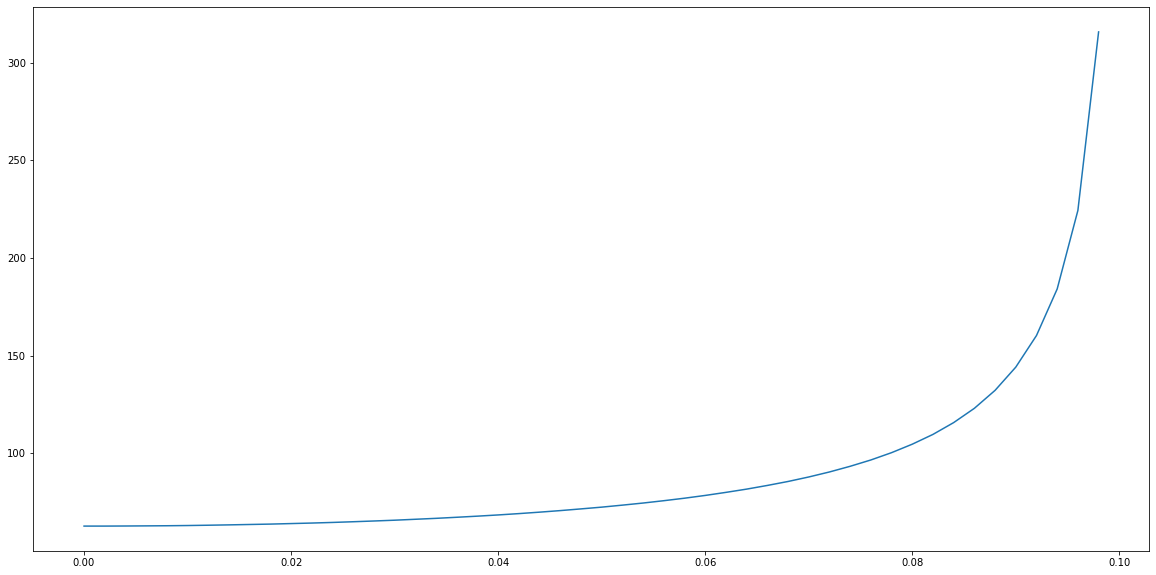

In [24]:
tmax = 1000
dt = tmax/3000
ω = 0.1
xini = [0]
t = np.arange(0, tmax, dt)
alist = np.arange(0,0.1,0.002)
per = []
for a in alist:
    x = solve(snlc, t, xini, args=(ω,a))
    x = var_apply(x,'cos')
    per.append(findperiod(t,-x[:,0]))
plt.figure(figsize=(20,10))    
plt.plot(alist,per)

Podemos ver que para $a=0$ el periodo converge a $T=2\pi/\omega$ y que a medida que 
$a$ se acerca a $\omega$ el periodo se hace mas y mas largo. Finalmente diverge y el 
periodo se hace infinito en la bifurcacion de nodo-silla.

Esta divergencia del periodo se debe al 'critical slowing down' (ralentizado) que anuncia la proximidad de una bifurcacion de nodo-silla y aparece siempre cerca de este tipo de bifurcacion.

De forma mas general (y en 2D y 3D) vamos a ver que esta bifuracion se puede dar sobre un ciclo limite y se llama SNLC (Saddle Node on Limit Cycle) o nodo silla sobre ciclo limite y se caracteriza porque da origen a oscilaciones que se crean con periodo arbitrariamente grande. Esto va a distinguir a estas oscilaciones de otro tipo de bifurcacion de da origen a oscilaciones con periodo definido (bifurcacion de Hopf)

## DIAGRAMA DE BIFURCACIONES

Bifurcacion de Nodo Silla (SN Saddle-Node) 

0.095
0.0952020202020202
0.09540404040404041
0.09560606060606061
0.09580808080808081
0.09601010101010102
0.09621212121212121
0.09641414141414141
0.09661616161616161
0.09681818181818182
0.09702020202020202
0.09722222222222222
0.09742424242424243
0.09762626262626263
0.09782828282828283
0.09803030303030304
0.09823232323232324
0.09843434343434343
0.09863636363636363
0.09883838383838384
0.09904040404040404
0.09924242424242424
0.09944444444444445
0.09964646464646465
0.09984848484848485
0.10005050505050506
0.10025252525252526
0.10045454545454546
0.10065656565656565
0.10085858585858586
0.10106060606060606
0.10126262626262626
0.10146464646464647
0.10166666666666667
0.10186868686868687
0.10207070707070708
0.10227272727272728
0.10247474747474748
0.10267676767676767
0.10287878787878788
0.10308080808080808
0.10328282828282828
0.10348484848484849
0.10368686868686869
0.10388888888888889
0.1040909090909091
0.1042929292929293
0.1044949494949495
0.1046969696969697
0.10489898989898991
0.1051010101010101


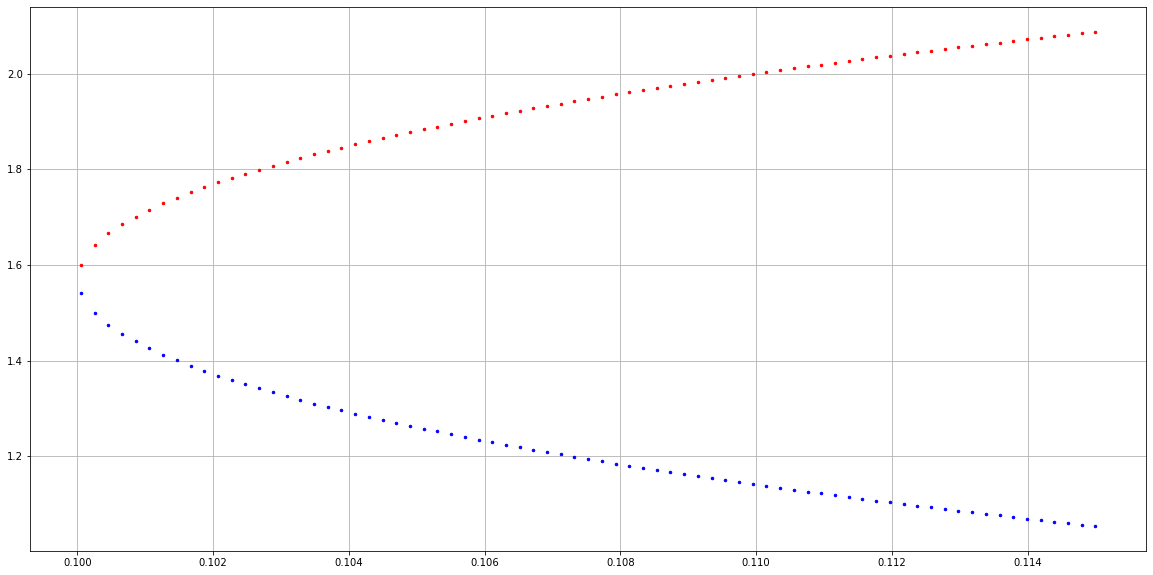

In [72]:
par={'ω':0.1,'a':0.1}
tmax = 1000
dt = tmax/300
xini = [np.pi/2]
avals = np.linspace(0.095,0.115,100)
bifurcation_diag(snlc, par, xini, tmax, dt, 'a', avals, xrange=[0,np.pi],var='angle');

# Excitacion periodica

Cuando excitamos un oscilador lineal de frecuencia propia $\omega$ con un forzado periodico externo de frecuencia $\Omega$ solo podemos tener una respuesta posible, el oscilador se sincroniza a la frecuencia externa con una amplitud que depende de la diferencia de las frecuencias, lo que se conoce como resonancia.

Dicho de otro modo la unica libertad que tiene un oscilador lineal para responder a un forzado es mediante la amplitud, pero no puede hacer nada mas.

Cuando excitamos a un oscilador no lineal como el que da la ecuacion de Adler con un forzado periodico externo de frecuencia $\Omega$ con amplitu $p$ tenemos un repertorio muchisimo mas variado de respuestas posibles.

$\dot{\theta} = \omega-a\sin(\theta)+p\sin(\Omega)$


In [6]:
#definimos la ed
def snlc_periodic(t, x, ω, a, p, Ω):
    return[
        ω-a*np.sin(x)+p*np.sin(Ω*t)
    ]

In [7]:
def solve_snlc_periodic(ω,a,p,Ω,xini,tmax,var):
    dt = tmax/1000
    par={'ω':ω,'a':a,'p':p,'Ω':Ω}
    return solve_plot(snlc_periodic,par,[xini],tmax,dt,var=var)

iplot2 = interactive(solve_snlc_periodic,
                    ω=(0,1.0,0.0001),
                    a=(0,1.0,0.0001), 
                    p=(0,1.0,0.0001), 
                    Ω=(0,1.0,0.0001), 
                    xini=(0,2*np.pi,0.001),
                    tmax=(1,2000,1),
                    var='angle')
                    
iplot2

interactive(children=(FloatSlider(value=0.5, description='ω', max=1.0, step=0.0001), FloatSlider(value=0.5, de…

# Dos osciladores acoplados

Otro ejemplo interesante es el de dos osciladores no lineales acoplados.
El termino de acople se expresa como el seno de la diferencia de fases. Esto fuerza la sincronizacion entre ambos osciladores


$\dot{\theta_1} = \omega_1-\sin(\theta_1) + k\sin(\theta_2-\theta_1)$

$\dot{\theta_2} = \omega_2-\sin(\theta_2) + k\sin(\theta_1-\theta_2)$

In [75]:
import importlib as imp
import putils
imp.reload(putils)
from putils import *

#definimos la ecuacion
def snlc_coupled(t, x, ω1, ω2, k):
    return[
        ω1-np.sin(x[0])+k*np.sin(x[1]-x[0]),
        ω2-np.sin(x[1])+k*np.sin(x[0]-x[1]),
    ]

In [76]:
# definimos una funcion para resolver la ecuacion diferencial
def solve_snlc_coupled(ω1,ω2,k,θ1,θ2,tmax,var,trans=0):
    dt = tmax/5000
    par={'ω1':ω1,'ω2':ω2,'k':k}
    if var=='angle':
        ranges=[[-np.pi,np.pi],[-np.pi,np.pi]]
    else:
        ranges=[[-1,1],[-1,1]]
    return solve_plot(snlc_coupled,par,[θ1,θ2],tmax,dt,ranges=ranges,var=var,trans=trans)


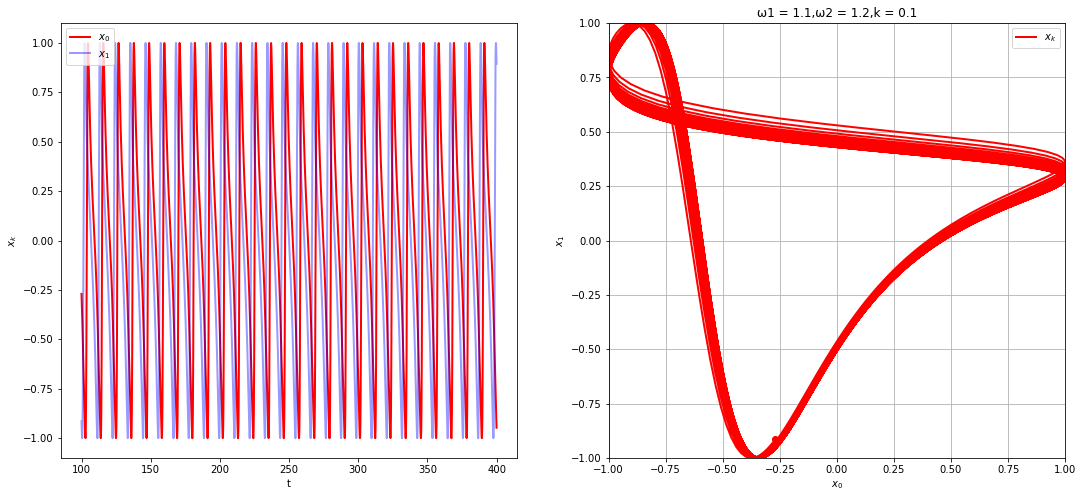

In [77]:
solve_snlc_coupled(1.1,1.2,0.1,-1.3,1.3,400,var='cos',trans=100)

In [78]:
iplot3 = interactive(solve_snlc_coupled,
                    ω1=(0,3.0,0.0001),
                    ω2=(0,3.0,0.0001),
                    k=(0,2.0,0.0001), 
                    θ1=(0,2*np.pi,0.001),
                    θ2=(0,2*np.pi,0.001), 
                    tmax=(1,1000,1),
                    var='angle',
                    trans=(0,1000,1))
                    
iplot3

interactive(children=(FloatSlider(value=1.5, description='ω1', max=3.0, step=0.0001), FloatSlider(value=1.5, d…